In [350]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(style="white")
#sns.set(font="monospace")

pd.options.display.width = 1000
pd.options.display.max_colwidth = 150
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:76% !important; }</style>"))

from pairwise import *
from preprocess import *
from ebi_summarize_data import check_df
from toolbox import mapp
from plots import plot_pca

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [392]:
md = pd.read_csv('/D/ebi/DEFAULT_METADATA.tsv', sep="\t", index_col=False)
tax_md = pd.read_csv('/D/ebi/taxonomy_metadata.tsv', sep="\t", index_col=False)

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
Ai = pd.read_csv('/D/ebi/A_OTU-TSV_v2_Fecal.tsv', sep="\t", index_col=0)
A = log_transform_counts(Ai)

In [140]:
A_fulli = pd.read_csv('/D/ebi/A_OTU-TSV_v2.tsv', sep="\t", index_col = 0)
A_full = log_transform_counts(A_fulli)

Over samples; raw
36683238.0


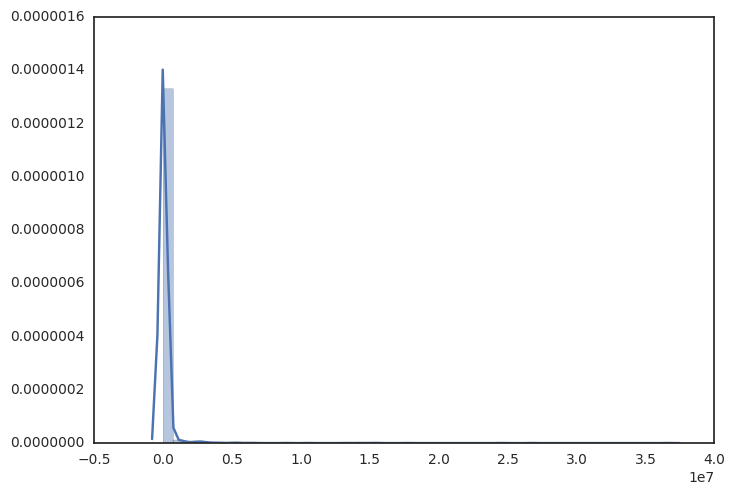

In [4]:
print("Over samples; raw")
print(Ai.sum(0).max())
p1 = sns.distplot(Ai.sum(0))

As expected, there is a disproportionate numeber of samples with lower counts and very little samples with high counts.

Over samples; log transform
25982.4918022


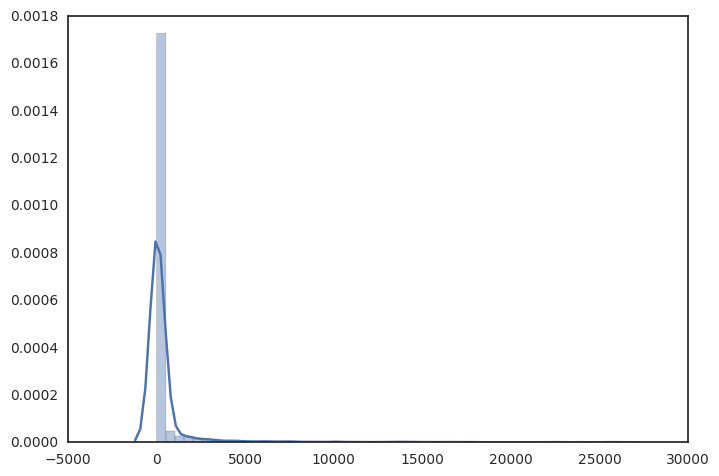

In [5]:
print("Over samples; log transform")
print(A.sum(0).max())
p2 = sns.distplot(A.sum(0))

Log transformation helps a little to even out the distribution of data, but the table below shows that still the 25th percentile is always (?) equal to 0.
- QST: would transforming by some other base logarithm help?

In [6]:
A.describe()

,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__; s__,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halalkalicoccus; s__jeotgali,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__hamelinensis,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halorhabdus; s__,...,k__Bacteria; p__[Caldithrix]; c__KSB1; o__WM105; f__; g__; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__CM44; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__Deinococcus; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__Deinococcus; s__geothermalis,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__B-42; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__GBI-58; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__Truepera; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Thermales; f__Thermaceae; g__Meiothermus; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Thermales; f__Thermaceae; g__Thermus; s__
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.0,4116.0,4116.0,4116.0,4116.000000,...,4116.0,4116.0,4116.000000,4116.000000,4116.0,4116.000000,4116.000000,4116.0,4116.000000,4116.000000
mean,0.000473,0.000842,0.000978,0.000658,0.000168,0.0,0.0,0.0,0.0,0.000168,...,0.0,0.0,0.012359,0.002091,0.0,0.000267,0.000473,0.0,0.001096,0.003485
std,0.030331,0.035828,0.043875,0.030370,0.010804,0.0,0.0,0.0,0.0,0.010804,...,0.0,0.0,0.167568,0.077797,0.0,0.017124,0.030331,0.0,0.050177,0.103691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
max,1.945910,2.079442,2.639057,1.609438,0.693147,0.0,0.0,0.0,0.0,0.693147,...,0.0,0.0,4.510860,4.043051,0.0,1.098612,1.945910,0.0,2.564949,3.555348


# Distances between taxons

In [7]:
tax_dist = pd.DataFrame(pairwise_distances(A.T), columns = A.columns, index = A.columns)

In [8]:
tax_dist_long = tax_dist.stack().reset_index()
tax_dist_long.columns = ["taxon1", "taxon2", "distance"]

In [9]:
tax_dist_long.head()

,taxon1,taxon2,distance
0,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,0.000000
1,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,0.989311
2,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145,3.422294
3,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170,2.753871
4,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis,2.065676


# Correlations between taxons

In [10]:
tax_corr = A.corr() # of columns

In [26]:
tax_corr_long = tax_corr.stack().reset_index()
tax_corr_long.columns = ['taxon1', 'taxon2', "Pearson's correlation"]
tax_corr_long = tax_corr_long[tax_corr_long['taxon1'] != tax_corr_long['taxon2']]

In [33]:
tax_corr.describe()

-0.510332232696
1.0


,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170,k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__; s__,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halalkalicoccus; s__jeotgali,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__hamelinensis,k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halorhabdus; s__,...,k__Bacteria; p__[Caldithrix]; c__KSB1; o__WM105; f__; g__; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__CM44; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__Deinococcus; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__Deinococcus; s__geothermalis,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__B-42; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__GBI-58; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__Truepera; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Thermales; f__Thermaceae; g__Meiothermus; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Thermales; f__Thermaceae; g__Thermus; s__
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,0.0,0.0,0.0,0.0,1960.000000,...,0.0,0.0,1960.000000,1960.000000,0.0,1960.000000,1960.000000,0.0,1960.000000,1960.000000
mean,0.009849,0.008801,0.009583,-0.001217,0.001474,NaN,NaN,NaN,NaN,0.016824,...,NaN,NaN,0.101954,0.021452,NaN,0.049505,0.172150,NaN,0.103894,0.013044
std,0.059570,0.056365,0.044271,0.027565,0.028971,NaN,NaN,NaN,NaN,0.080652,...,NaN,NaN,0.111824,0.080413,NaN,0.156618,0.303676,NaN,0.184697,0.050392
min,-0.017317,-0.026110,-0.046803,-0.051373,-0.012102,NaN,NaN,NaN,NaN,-0.022826,...,NaN,NaN,-0.048702,-0.031208,NaN,-0.015320,-0.018491,NaN,-0.020112,-0.029179
25%,-0.001087,-0.001612,-0.001766,-0.002250,-0.001241,NaN,NaN,NaN,NaN,-0.001050,...,NaN,NaN,-0.001150,-0.001336,NaN,-0.000807,-0.000487,NaN,-0.000678,-0.001624
50%,-0.000465,-0.000696,-0.000639,-0.000839,-0.000523,NaN,NaN,NaN,NaN,-0.000452,...,NaN,NaN,0.064706,-0.000593,NaN,-0.000344,-0.000243,NaN,-0.000341,-0.000741
75%,-0.000243,-0.000366,-0.000348,-0.000453,-0.000243,NaN,NaN,NaN,NaN,-0.000243,...,NaN,NaN,0.190045,-0.000419,NaN,-0.000243,0.198082,NaN,0.118847,-0.000524
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000


Why are there NaNs in describe()? There aren't any zero-count-sum taxons...

In [262]:
print(float(tax_corr_long[["Pearson's correlation"]].max()))
print(float(tax_corr_long[["Pearson's correlation"]].min()))

tax_corr_long.sort_values("Pearson's correlation", ascending=False).head()

1.000000000000265
-0.5103322326960209


,taxon1,taxon2,Pearson's correlation
3837554,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__GBI-58; s__,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Rhodanobacter; s__,1.0
3596597,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Rhodanobacter; s__,k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Trueperaceae; g__GBI-58; s__,1.0
476154,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Nocardiopsaceae; g__Thermobifida; s__fusca,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Rhodanobacter; s__,1.0
3595230,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Rhodanobacter; s__,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Alicyclobacillaceae; g__Alicyclobacillus; s__ferripilum,1.0
3594882,k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Rhodanobacter; s__,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Nocardiopsaceae; g__Thermobifida; s__fusca,1.0


# PCA and clustering

### taxons

In [443]:
x_t = mapp(tax_md, index_col='taxonomy', cols=['phylum', 'class', 'order'])
comps_t = pd.DataFrame(pca_t.components_[:2,:].T, index = A.columns, columns = ['PC1', 'PC2'])
comps_t = pd.merge(comps_t, x_t, how="inner", left_index=True, right_index=True)

n points 2600
65 phyla


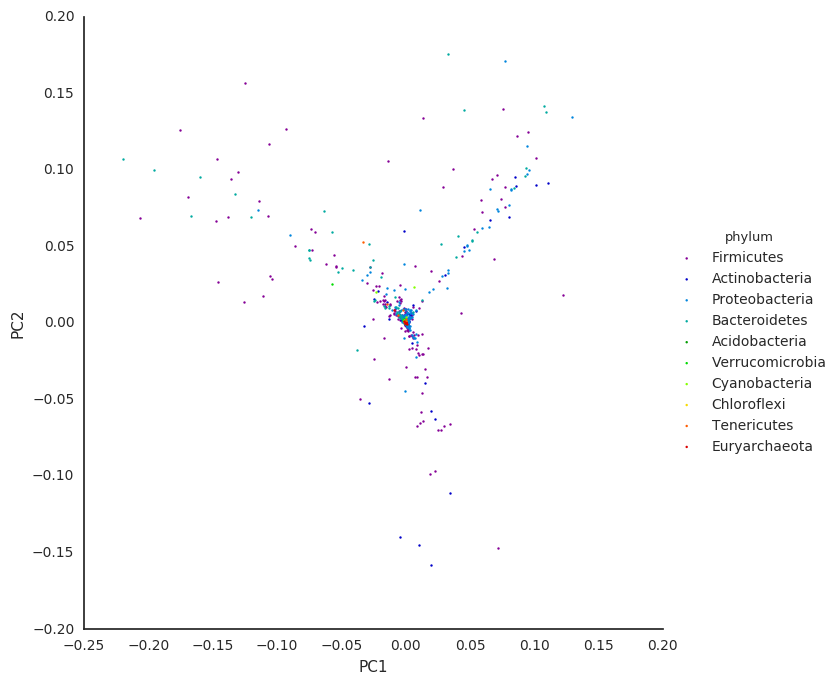

In [445]:
print("n points", comps_t.shape[0])
print(len(comps_t.phylum.drop_duplicates()), "phyla") # plotted out of", x5, "for", plot_biomes2)

plot_pca(pca_t, A.T, tax_md, mapp_index_col='taxonomy', color_by='phylum', plot_subset=10)

(-0.001, 0.001)

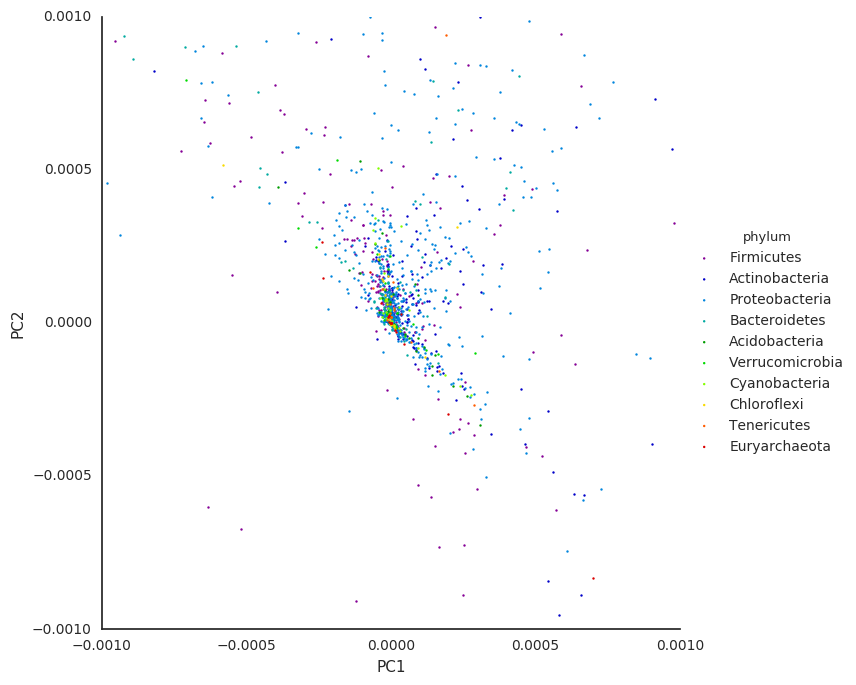

In [446]:
p2 = plot_pca(pca_t, A.T, tax_md, mapp_index_col='taxonomy', color_by='phylum', plot_subset=10)

p2.axes[0,0].set_ylim(-0.001,0.001)
p2.axes[0,0].set_xlim(-0.001,0.001)

### samples

In [406]:
use_df = A_full

In [407]:
pca_s = PCA(n_components=10)
pca_s.fit(use_df.T)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#def add_color_col(df, base_col_name):
#    x = [i for i in df[[base_col_name]].drop_duplicates()]
#    x.insert(0, "colors", sns.color_palette("hls", 10))
#    return x

In [408]:
x_s = mapp(md, index_col='sample_id', cols=['biome', 'project_id'])

In [409]:
comps_s = pd.DataFrame(pca_s.components_[:2,:].T, index = use_df.index, columns = ['PC1', 'PC2'])
comps_s = pd.merge(comps_s, x_s, how="inner", left_index=True, right_index=True)

In [410]:
# plot only the most common
plot_biomes = ['Fecal', 'Human', 'Soil', 'Digestive System', 'Vagina', # top 5
               'Skin', 'Large Intestine', "Plants", "Agricultural", "Activated Sludge", # top 10
#"Dairy products",
#"Fungi",
#"Forest soil",
#"Rumen",
#"Contaminated",
#"Oral", # over 1000 counts
]

plot_comps_s = comps_s.ix[
    comps_s['biome'].apply(
        lambda x: x in plot_biomes
        ),:]



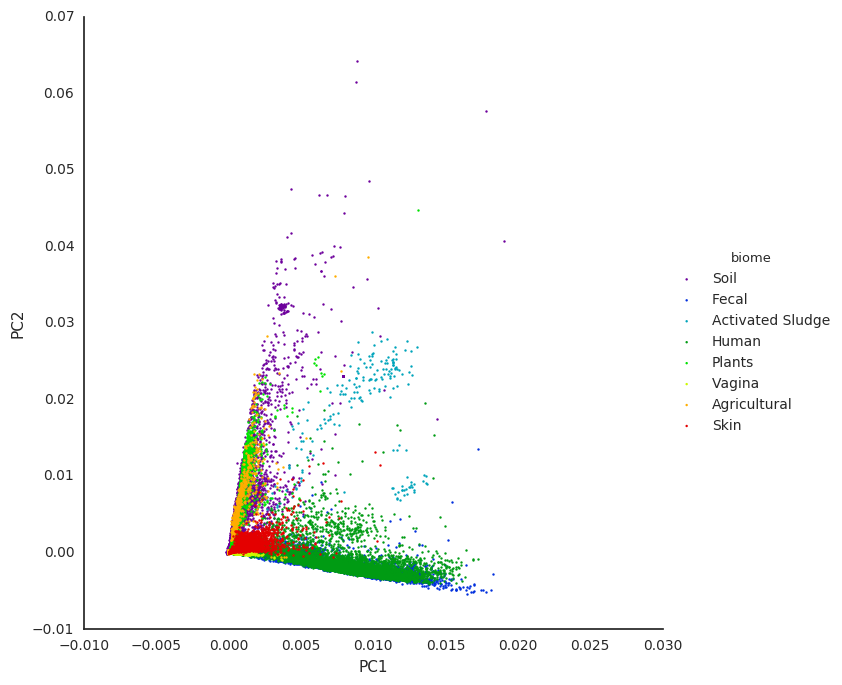

In [411]:
p3 = sns.lmplot(x="PC1", y="PC2", hue="biome", data=plot_comps_s,
           ci=None, palette="spectral", fit_reg=False, size=7, #col_wrap=2, 
           scatter_kws={"s": 3, "alpha": 1}
           )


Biomes seem to cluster either by PC1 or PC2 (rather than both). Clusters make sense, at least for the most abundant biomes: Soil clusters with Plants and Agricultural, Human (which may be mainly fecal samples actually) with Fecal, and Skin is sort of in between, which seems interesting.

- QST: There's a visible structure about the data - not sure why that is - perhaps counts (non-negative values) orlog transformation caused this?

7 projects plotted out of 31 for ['Fecal']


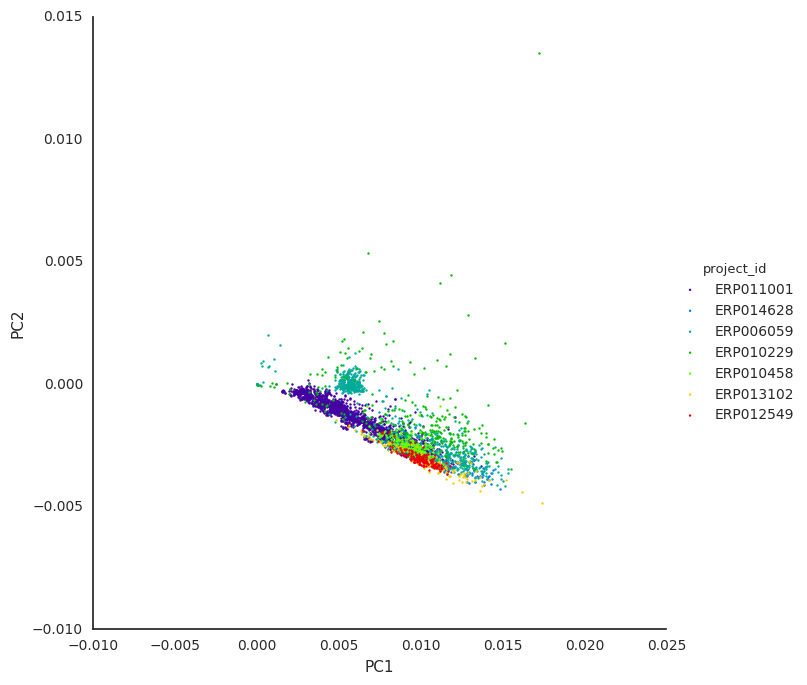

In [412]:
plot_biomes2 = ['Fecal']
#plot_biomes2 = plot_biomes
plot_comps_s2 = comps_s.ix[
    comps_s.biome.apply(
        lambda x: x in plot_biomes2
        ),:]

# subset most abundant projects
count_threshold = 75

x5 = len(plot_comps_s2.project_id.drop_duplicates())
plot_projects2=(plot_comps_s2.groupby('project_id').count() > count_threshold).PC1
plot_projects2 = plot_projects2[plot_projects2].index

plot_comps_s2 = comps_s.ix[
    comps_s.project_id.apply(
        lambda x: x in plot_projects2
        ),:]
print(len(plot_comps_s2.project_id.drop_duplicates()), "projects plotted out of", x5, "for", plot_biomes2)


p3 = sns.lmplot(x="PC1", y="PC2", hue="project_id", data=plot_comps_s2,
           ci=None, palette="spectral", fit_reg=False, size=7, #col_wrap=2, 
           scatter_kws={"s": 3, "alpha": 1}
           )

# TODO:
- other ordination techniques (ordinate.R)
- **DONE** PCA within biome, color by project ID
- pca plot into a function (plots.py)
- color taxon PCA plot by e.g. phylum, order (more work - need to break down the tax names)
- log transform by a log with larger base?
- inspect correlations == 1
- inspect NaNs in tax_corr.describe()